# Gia Gillis

## Loan Interest Rate Analysis Part 2 of 3

### Examine cleaned data to look for patterns, correlations, etc.

### See more visualizations at Tableau link https://public.tableau.com/profile/gia.g#!/vizhome/LoanInterestRateAnalysis/Dashboard1

#### Import necessary libraries.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

#### Load clean data and force Loan Id and Borrower Id into strings.

In [158]:
loans=pd.read_csv(r'data\clean_loan_interest_rates.csv', parse_dates=True)

In [142]:
loans.head(10)

,Interest Rate,Requested,Funded,Investor Funded,Number of Payments,Loan Grade,Loan Subgrade,Years Employed,Home,Annual Income,...,Loan Cat,State,Ratio,Late Payments,Credit Line Date,Months Del,Months PR,Derog Recs,Credit Lines,Status
0,0.1189,25000.0,25000.0,19080.0,36 MONTHS,B,B4,< 1 YEAR,RENT,85000.0,...,DEBT_CONSOLIDATION,CA,19.48,0.0,1994-02-01,0.0,0.0,0.0,42.0,F
1,0.1071,7000.0,7000.0,673.0,36 MONTHS,B,B5,< 1 YEAR,RENT,65000.0,...,CREDIT_CARD,NY,14.29,0.0,2000-10-01,0.0,0.0,0.0,7.0,F
2,0.1699,25000.0,25000.0,24725.0,36 MONTHS,D,D3,1 YEAR,RENT,70000.0,...,DEBT_CONSOLIDATION,NY,10.50,0.0,2000-06-01,41.0,0.0,0.0,17.0,F
3,0.1311,1200.0,1200.0,1200.0,36 MONTHS,C,C2,10+ YEARS,OWN,54000.0,...,DEBT_CONSOLIDATION,TX,5.47,0.0,1985-01-01,64.0,0.0,0.0,31.0,F
4,0.1357,10800.0,10800.0,10692.0,36 MONTHS,C,C3,6 YEARS,RENT,32000.0,...,DEBT_CONSOLIDATION,CT,11.63,0.0,1996-12-01,58.0,0.0,0.0,40.0,F
5,0.1905,7200.0,7200.0,7200.0,36 MONTHS,D,D4,9 YEARS,RENT,58000.0,...,DEBT_CONSOLIDATION,RI,2.05,0.0,1994-04-01,26.0,0.0,0.0,25.0,F
6,0.1008,7500.0,5025.0,557.0,36 MONTHS,B,B3,3 YEARS,RENT,85000.0,...,DEBT_CONSOLIDATION,CA,8.10,0.0,2000-11-01,0.0,0.0,0.0,11.0,F
7,0.1426,3000.0,3000.0,2988.0,36 MONTHS,C,C5,3 YEARS,MORTGAGE,80800.0,...,CREDIT_CARD,TX,14.97,1.0,1998-07-01,13.0,0.0,0.0,23.0,F
8,0.0788,4000.0,4000.0,3900.0,36 MONTHS,A,A5,< 1 YEAR,MORTGAGE,148000.0,...,CREDIT_CARD,TX,16.98,0.0,1993-05-01,0.0,0.0,0.0,19.0,F
9,0.1496,5600.0,5600.0,5525.0,36 MONTHS,D,D2,1 YEAR,RENT,45000.0,...,DEBT_CONSOLIDATION,MD,4.00,0.0,2001-06-01,38.0,63.0,1.0,9.0,F


In [143]:
loans.dtypes

Interest Rate         float64
Requested             float64
Funded                float64
Investor Funded       float64
Number of Payments     object
Loan Grade             object
Loan Subgrade          object
Years Employed         object
Home                   object
Annual Income         float64
Income Verified        object
Loan Date              object
Loan Cat               object
State                  object
Ratio                 float64
Late Payments         float64
Credit Line Date       object
Months Del            float64
Months PR             float64
Derog Recs            float64
Credit Lines          float64
Status                 object
dtype: object

In [144]:
loans.shape

(287001, 22)

In [145]:
loans['Loan Date'].head()

0    2009-08-01
1    2008-05-01
2    2014-08-01
3    2010-03-01
4    2009-11-01
Name: Loan Date, dtype: object

#### Convert date strings to date objects.

In [159]:
loans['Loan Date']=pd.to_datetime(loans['Loan Date'], format='%Y-%m-%d')
loans['Credit Line Date']=pd.to_datetime(loans['Credit Line Date'], format='%Y-%m-%d')

In [147]:
loans['Loan Date'].head()

0   2009-08-01
1   2008-05-01
2   2014-08-01
3   2010-03-01
4   2009-11-01
Name: Loan Date, dtype: datetime64[ns]

In [148]:
loans['Credit Line Date'].head()

0   1994-02-01
1   2000-10-01
2   2000-06-01
3   1985-01-01
4   1996-12-01
Name: Credit Line Date, dtype: datetime64[ns]

In [149]:
loans.describe()

,Interest Rate,Requested,Funded,Investor Funded,Annual Income,Ratio,Late Payments,Months Del,Months PR,Derog Recs,Credit Lines
count,287001.000000,287001.000000,287001.000000,287001.000000,2.870010e+05,287001.000000,287001.000000,287001.000000,287001.000000,287001.000000,287001.000000
mean,0.139453,14272.933892,14243.709517,14174.273187,7.313565e+04,17.003390,0.275159,15.550782,9.735189,0.152979,24.964694
std,0.043774,8258.268768,8243.806677,8263.700969,5.209357e+04,7.694729,0.783545,22.518654,27.583436,0.513295,11.467995
min,0.054200,500.000000,500.000000,0.000000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.109900,8000.000000,8000.000000,8000.000000,4.865000e+04,11.260000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.136800,12000.000000,12000.000000,12000.000000,7.000000e+04,16.710000,0.000000,0.000000,0.000000,0.000000,23.000000
75%,0.167800,20000.000000,20000.000000,19900.000000,8.200000e+04,22.500000,0.000000,28.000000,0.000000,0.000000,32.000000
max,0.260600,35000.000000,35000.000000,35000.000000,7.500000e+06,39.990000,29.000000,188.000000,129.000000,63.000000,118.000000


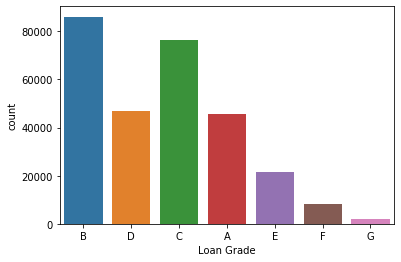

In [86]:
sns.countplot(loans['Loan Grade'])

#### Boxplot of Loan Grade and Interest Rate, showing that better loan grades have lower interest rates.

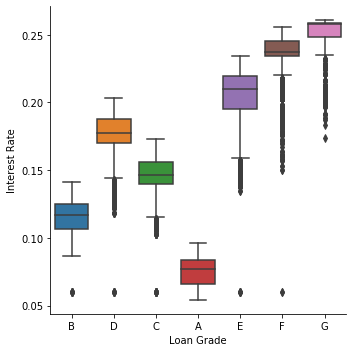

In [69]:
sns.catplot(x='Loan Grade', y='Interest Rate', data=loans, kind='box')

#### Examine loan categories

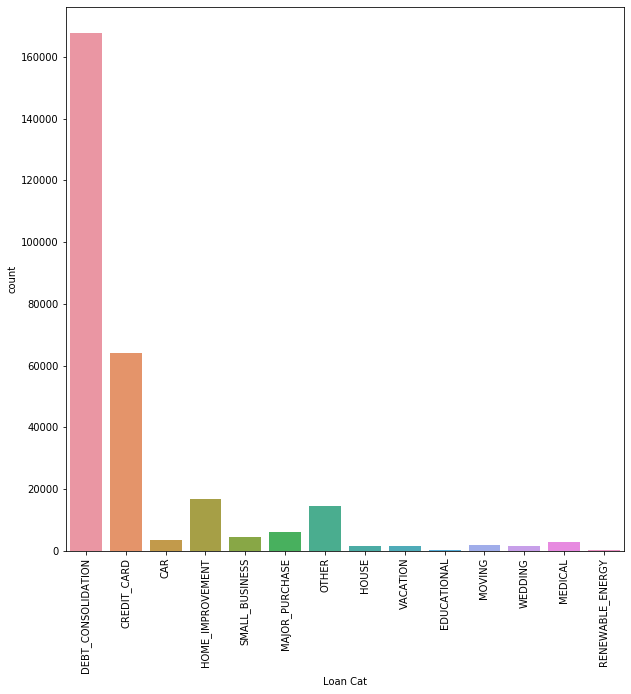

In [72]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(loans['Loan Cat'])

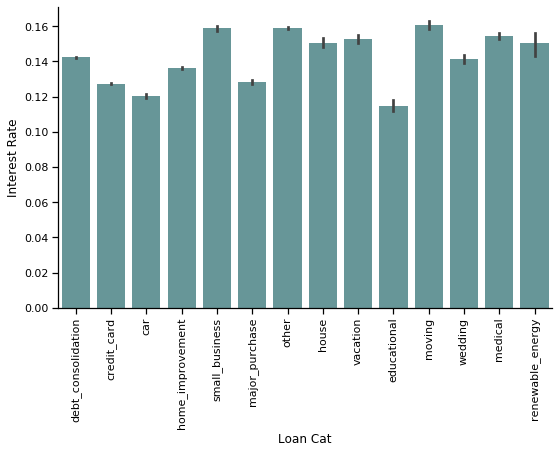

In [28]:
g=sns.catplot(x='Loan Cat', y='Interest Rate', data=loans, kind='bar', color='cadetblue')
g.fig.set_size_inches(10, 5)
plt.xticks(rotation=90)
plt.show()

#### Examine home ownership

In [15]:
loans['Home'].value_counts()

MORTGAGE    145958
RENT        115958
OWN          24976
Name: Home, dtype: int64

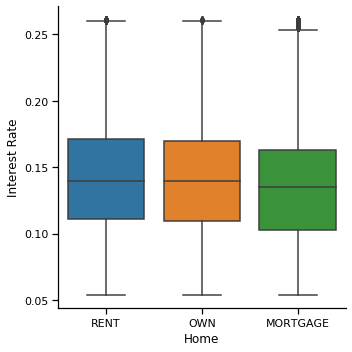

In [25]:
sns.catplot(x='Home', y='Interest Rate', data=loans, kind='box')

#### Income Verified vs Interest Rate

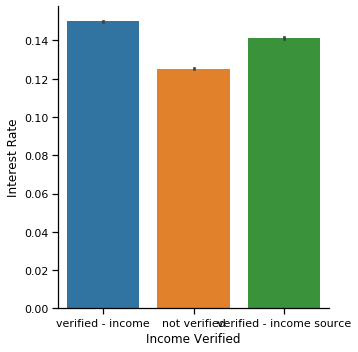

In [26]:
sns.catplot(x='Income Verified', y='Interest Rate', data=loans, kind='bar')

#### Examine number of payments (36 months or 60 months) and interest rate.

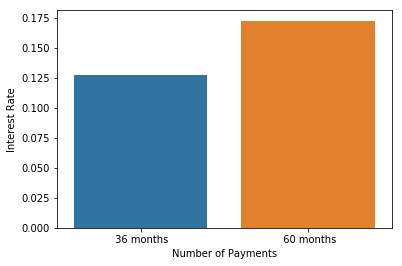

In [20]:
subset=loans[['Number of Payments', 'Interest Rate']].dropna()
sns.barplot(x='Number of Payments', y='Interest Rate', data=subset)

#### Examine distribution of interest rate, credit lines, and ratio.

C:\Users\Gia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


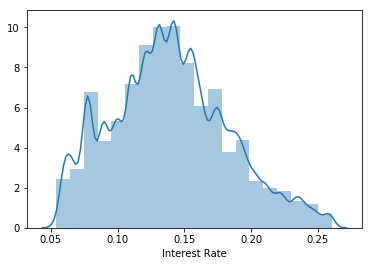

In [21]:
sns.distplot(loans['Interest Rate'], bins=20)

C:\Users\Gia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


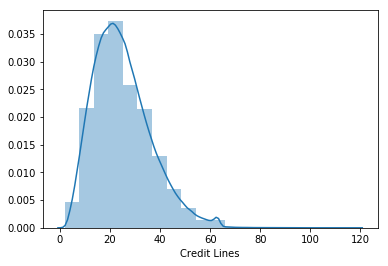

In [22]:
sns.distplot(loans['Credit Lines'].dropna(), bins=20)

C:\Users\Gia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


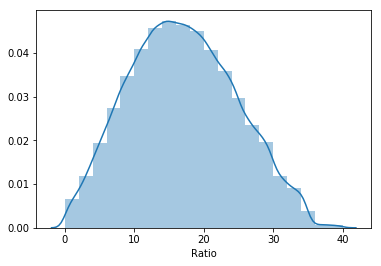

In [23]:
sns.distplot(loans['Ratio'].dropna(), bins=20)

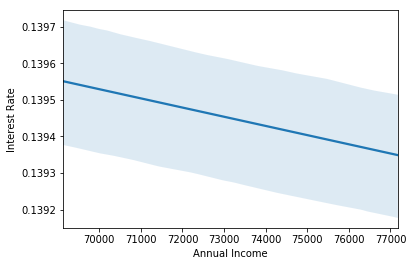

In [24]:
sns.regplot(x='Annual Income', y='Interest Rate', data=loans, scatter=False)

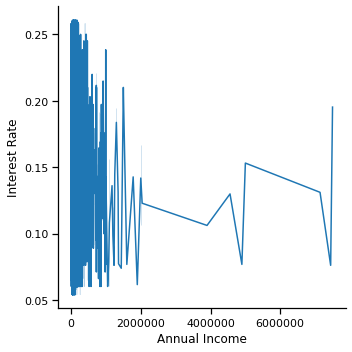

In [27]:
sns.relplot(x='Annual Income', y='Interest Rate', data=loans, kind='line')

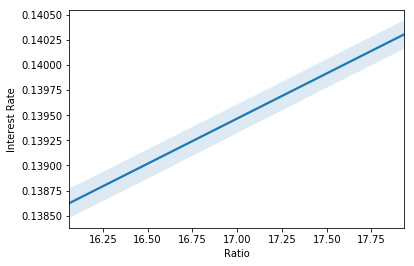

In [26]:
sns.regplot(x='Ratio', y='Interest Rate', data=loans, scatter=False)

#### Convert categorical data to labeled to check for correlations

In [160]:
backup=loans.copy()
backup

,Interest Rate,Requested,Funded,Investor Funded,Number of Payments,Loan Grade,Loan Subgrade,Years Employed,Home,Annual Income,...,Loan Cat,State,Ratio,Late Payments,Credit Line Date,Months Del,Months PR,Derog Recs,Credit Lines,Status
0,0.1189,25000.0,25000.0,19080.0,36 MONTHS,B,B4,< 1 YEAR,RENT,85000.0,...,DEBT_CONSOLIDATION,CA,19.48,0.0,1994-02-01,0.0,0.0,0.0,42.0,F
1,0.1071,7000.0,7000.0,673.0,36 MONTHS,B,B5,< 1 YEAR,RENT,65000.0,...,CREDIT_CARD,NY,14.29,0.0,2000-10-01,0.0,0.0,0.0,7.0,F
2,0.1699,25000.0,25000.0,24725.0,36 MONTHS,D,D3,1 YEAR,RENT,70000.0,...,DEBT_CONSOLIDATION,NY,10.50,0.0,2000-06-01,41.0,0.0,0.0,17.0,F
3,0.1311,1200.0,1200.0,1200.0,36 MONTHS,C,C2,10+ YEARS,OWN,54000.0,...,DEBT_CONSOLIDATION,TX,5.47,0.0,1985-01-01,64.0,0.0,0.0,31.0,F
4,0.1357,10800.0,10800.0,10692.0,36 MONTHS,C,C3,6 YEARS,RENT,32000.0,...,DEBT_CONSOLIDATION,CT,11.63,0.0,1996-12-01,58.0,0.0,0.0,40.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286996,0.1299,10000.0,10000.0,10000.0,60 MONTHS,C,C1,8 YEARS,RENT,50000.0,...,CREDIT_CARD,FL,21.51,0.0,2003-11-01,26.0,0.0,0.0,20.0,W
286997,0.1629,13150.0,13150.0,13150.0,36 MONTHS,D,D2,1 YEAR,OWN,30000.0,...,DEBT_CONSOLIDATION,TX,29.76,0.0,2007-10-01,38.0,0.0,0.0,21.0,F
286998,0.1099,20000.0,20000.0,20000.0,60 MONTHS,B,B3,1 YEAR,MORTGAGE,99000.0,...,CREDIT_CARD,TX,24.13,0.0,2004-10-01,63.0,0.0,0.0,48.0,W
286999,0.1757,18475.0,18475.0,18475.0,60 MONTHS,D,D4,10+ YEARS,OWN,42000.0,...,DEBT_CONSOLIDATION,TX,31.43,0.0,1994-03-01,0.0,0.0,0.0,31.0,F


In [161]:
from sklearn.preprocessing import LabelEncoder
cat_columns=loans.select_dtypes(include='object').columns
encode=LabelEncoder()
for i in cat_columns:
    loans[i] = encode.fit_transform(loans[i])

In [162]:
loans.head()

,Interest Rate,Requested,Funded,Investor Funded,Number of Payments,Loan Grade,Loan Subgrade,Years Employed,Home,Annual Income,...,Loan Cat,State,Ratio,Late Payments,Credit Line Date,Months Del,Months PR,Derog Recs,Credit Lines,Status
0,0.1189,25000.0,25000.0,19080.0,0,1,8,10,2,85000.0,...,2,4,19.48,0.0,1994-02-01,0.0,0.0,0.0,42.0,0
1,0.1071,7000.0,7000.0,673.0,0,1,9,10,2,65000.0,...,1,33,14.29,0.0,2000-10-01,0.0,0.0,0.0,7.0,0
2,0.1699,25000.0,25000.0,24725.0,0,3,17,0,2,70000.0,...,2,33,10.50,0.0,2000-06-01,41.0,0.0,0.0,17.0,0
3,0.1311,1200.0,1200.0,1200.0,0,2,11,1,1,54000.0,...,2,42,5.47,0.0,1985-01-01,64.0,0.0,0.0,31.0,0
4,0.1357,10800.0,10800.0,10692.0,0,2,12,6,2,32000.0,...,2,6,11.63,0.0,1996-12-01,58.0,0.0,0.0,40.0,0


#### Find correlation among features

In [163]:
features=loans.drop('Interest Rate', axis=1)
features_corr=features.corr()
features_corr

,Requested,Funded,Investor Funded,Number of Payments,Loan Grade,Loan Subgrade,Years Employed,Home,Annual Income,Income Verified,Loan Cat,State,Ratio,Late Payments,Months Del,Months PR,Derog Recs,Credit Lines,Status
Requested,1.000000,0.998297,0.994094,0.411512,0.177158,0.185500,-0.040319,-0.175580,0.326489,0.240366,-0.152383,0.020774,0.059904,0.008831,-0.025312,-0.097173,-0.075418,0.237808,0.052879
Funded,0.998297,1.000000,0.996155,0.409149,0.176872,0.185041,-0.040543,-0.175481,0.325803,0.240860,-0.154186,0.021007,0.061459,0.009490,-0.024610,-0.096741,-0.074854,0.237671,0.055370
Investor Funded,0.994094,0.996155,1.000000,0.409949,0.175617,0.183718,-0.041357,-0.175826,0.324019,0.244826,-0.158012,0.021238,0.065588,0.010393,-0.023707,-0.095177,-0.073210,0.238122,0.060783
Number of Payments,0.411512,0.409149,0.409949,1.000000,0.468699,0.480535,-0.024079,-0.101801,0.063731,0.236517,-0.033692,0.026285,0.085936,0.005297,-0.002791,-0.020729,-0.019068,0.098304,0.039036
Loan Grade,0.177158,0.176872,0.175617,0.468699,1.000000,0.977330,-0.010280,0.051721,-0.021284,0.147525,0.146121,0.006334,0.138992,0.089972,0.073968,0.061568,0.070243,-0.023389,0.000938
Loan Subgrade,0.185500,0.185041,0.183718,0.480535,0.977330,1.000000,-0.010618,0.053576,-0.021070,0.153986,0.149046,0.007076,0.143456,0.092023,0.077131,0.063196,0.072497,-0.024532,0.003519
Years Employed,-0.040319,-0.040543,-0.041357,-0.024079,-0.010280,-0.010618,1.000000,0.068029,-0.020226,-0.011087,0.010192,-0.014993,-0.021410,-0.024981,-0.017300,-0.019706,-0.018833,-0.056067,-0.011260
Home,-0.175580,-0.175481,-0.175826,-0.101801,0.051721,0.053576,0.068029,1.000000,-0.138974,-0.035137,0.034061,-0.065066,-0.003654,-0.044843,-0.020278,-0.008615,-0.001981,-0.203037,-0.025654
Annual Income,0.326489,0.325803,0.324019,0.063731,-0.021284,-0.021070,-0.020226,-0.138974,1.000000,0.089572,0.010113,-0.002632,-0.166462,0.055108,0.018204,-0.046379,-0.015040,0.203325,0.019652
Income Verified,0.240366,0.240860,0.244826,0.236517,0.147525,0.153986,-0.011087,-0.035137,0.089572,1.000000,-0.017988,0.002719,0.061017,0.020093,0.017115,0.037330,0.063654,0.067339,0.053517


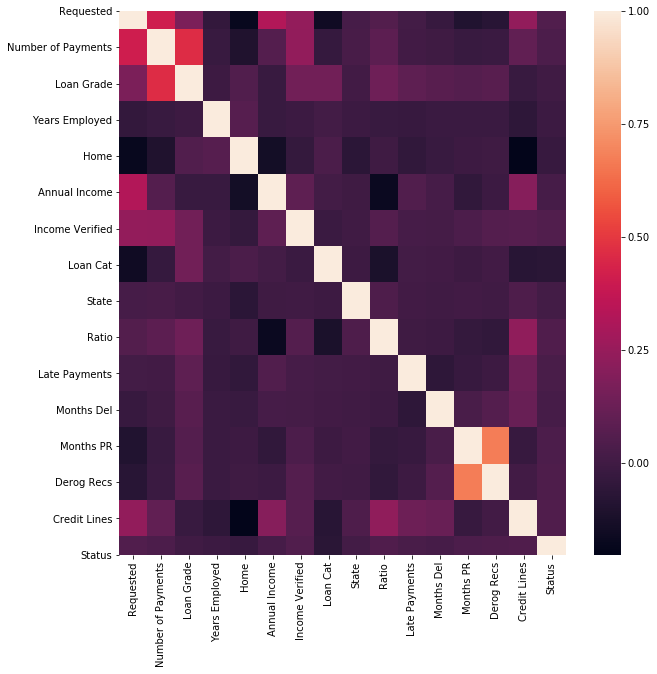

In [94]:
plt.figure(figsize=(10,10))
sns.heatmap(features_corr)

### From the heatmap, Loan Grade and Loan Subgrade are highly correlated and Requested, Funded, and Investor Funded are highly correlated.  With this information, Loan Subgrade, Funded, and Investor Funded will be dropped

In [164]:
loans=backup.copy()
loans=loans.drop(['Loan Subgrade', 'Funded', 'Investor Funded'], axis=1)
cat_columns=cat_columns.drop(['Loan Subgrade'])

In [165]:
loans.shape

(287001, 19)

For categorical data, get dummies

In [174]:
dum=pd.get_dummies(loans[cat_columns], prefix=cat_columns, drop_first=True)
dum

,Number of Payments_ 60 MONTHS,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Years Employed_10+ YEARS,Years Employed_2 YEARS,Years Employed_3 YEARS,...,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Status_W
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286996,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
286997,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
286998,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
286999,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


Drop categorical columns and add dummy dataframe

In [175]:
loans=loans.drop(cat_columns, axis=1)
loans=pd.concat([loans, dum], axis=1)
loans.shape

In [178]:
loans.to_csv(r'data\clean_loan_interest_rates_2.csv', index=False)